
<h2> import </h2>


In [54]:
import geemap
import os
import ee
import matplotlib.pyplot as plt
from geemap import cartoee
import cartopy.crs as ccrs
from sqlalchemy import false, true

geemap.ee_initialize()

<h3>設定年份經緯度</h3>

In [55]:
#經緯度要到小數點後面一點 
lat = 35.6893 # 緯度
lon = 139.6918 # 經度

point = ee.Geometry.Point(lon,lat)
#設定時間
start_year = 2013
end_year = 2022
years = ee.List.sequence(start_year, end_year)




<h3> 選取圖片 </h3>


In [56]:
def get_best_image(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = (
        ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA")
        .filterBounds(point)#設定範圍
        .filter(ee.Filter.calendarRange(1, 12, 'month'))#指定月份 1-12月
        .filterDate(start_date, end_date)
        .sort('CLOUD_COVER').first()#去雲
        )
    return ee.Image(image)

vis_params = {"bands": ['B3', 'B2', 'B1'],#rbg
              "min": 0.0,
              "max": 0.4,
              "gamma" : 1.2, #亮度             
            }

collection = ee.ImageCollection(years.map(get_best_image))
image = ee.Image(collection.first())


<h3>從地圖上看選取範圍<h3>


In [57]:
Map = geemap.Map()

Map.setCenter(lon, lat, 8)
Map.addLayer(image, vis_params, 'True Color (432)')
Map

Map(center=[35.6893, 139.6918], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…


<h3> 顯示圖片 </h3>


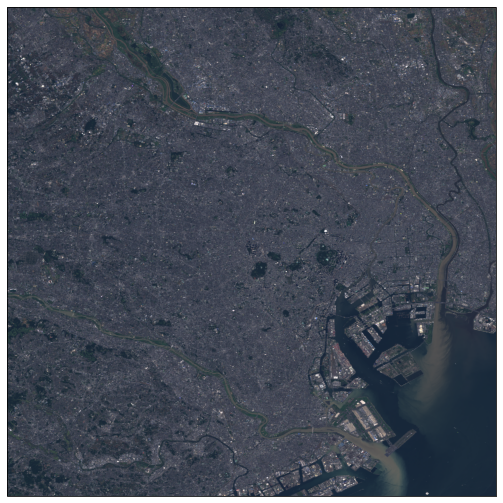

In [58]:
#設定範圍
w = 0.2
h = 0.2
region = [lon - w, lat - h, lon + w, lat + h]

fig = plt.figure(figsize=(10, 9))
ax = cartoee.get_map(image, region=region, vis_params=visualization)
plt.show()

<h3>下載圖片</h3>

In [59]:
collection.aggregate_array('system:index').getInfo()

['LC08_107035_20130917',
 'LC08_107035_20140328',
 'LC08_107035_20151009',
 'LC08_107035_20160317',
 'LC08_107035_20170216',
 'LC08_107035_20181001',
 'LC08_107035_20191105',
 'LC08_107035_20200429',
 'LC08_107035_20211126',
 'LC08_107035_20220113']

In [60]:
#設定路徑及資料夾名稱
downloads_name = str(int(lon)) +","+ str(int(lat))
downloads_path = "~/Downloads/dataset/" + downloads_name

#下載圖片 要用再解註
cartoee.get_image_collection_gif(
    ee_ic=collection,
    out_dir=os.path.expanduser(downloads_path),
    out_gif="2012-now_timelapse.gif",
    vis_params=vis_params,
    region=region,#選取範圍
    fps=3,
    plot_title=" ",
    date_format='YYYY-MM-dd',
    fig_size=(10, 8),
    dpi_plot=100,
    file_format="png",
    verbose=True,
    )


GIF saved to C:\Users\alalala\Downloads\dataset\139,35\2012-now_timelapse.gif
